In [ ]:
import numpy as np # linear algebra #rgb values for images exist in a np array
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import PIL # Importing Image class from PIL module
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
#import time
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
#from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

In [ ]:
data_path = "drive/MyDrive/Car parking/data"
Categories = ["Free", "Full"]
img_size = 150

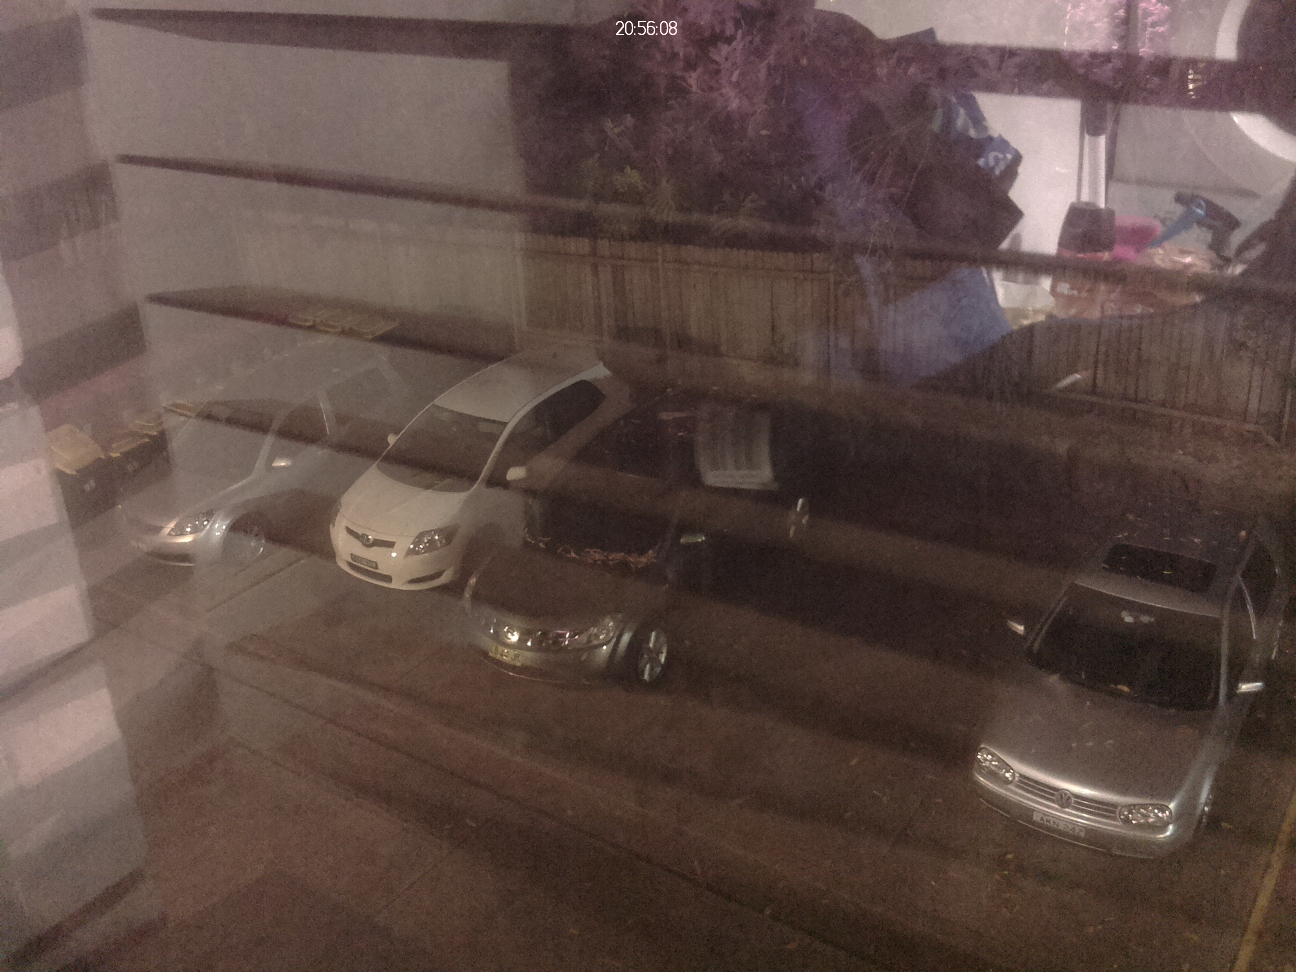

In [ ]:
# Let's view as image
from IPython.display import Image
Image("drive/MyDrive/Car parking/data/Free/img_126205602.jpg")

In [ ]:
data = []

def create_data():
    for category in Categories:
        path = os.path.join(data_path,category)
        class_num = Categories.index(category)
        print(path) #lepath to each category file
        for img in os.listdir(path):
            print(img) #path to each image in the category files
            img_arr = cv2.imread(os.path.join(path,img))
            new_img_arr = cv2.resize(img_arr,(img_size,img_size))
            data.append([new_img_arr,class_num])
create_data()

drive/MyDrive/Car parking/data/Free
img_1007083058.jpg
img_1006165558.jpg
img_1007082558.jpg
img_1006145058.jpg
img_1006145558.jpg
img_1006152058.jpg
img_1006152559.jpg
img_1006143557.jpg
img_1006151557.jpg
img_1006162058.jpg
img_1006154558.jpg
img_1006142057.jpg
img_1006164557.jpg
img_1006161058.jpg
img_1006144058.jpg
img_1006171058.jpg
img_1007085058.jpg
img_1006163057.jpg
img_1006144558.jpg
img_1006162558.jpg
img_1006160558.jpg
img_1006154057.jpg
img_1006164058.jpg
img_1006155057.jpg
img_1007084058.jpg
img_1006143058.jpg
img_1006153557.jpg
img_1007085558.jpg
img_1007083559.jpg
img_1006155558.jpg
img_1006151058.jpg
img_1006150557.jpg
img_1006153058.jpg
img_1006150058.jpg
img_1006160058.jpg
img_1006161558.jpg
img_1006141559.jpg
img_1007084558.jpg
img_1006165058.jpg
img_1006170558.jpg
img_1006163558.jpg
img_1006142558.jpg
img_1007174558.jpg
img_1008100558.jpg
img_1007173058.jpg
img_1007175558.jpg
img_1007092558.jpg
img_1007092058.jpg
img_1007091558.jpg
img_1007104058.jpg
img_1007091058

In [ ]:
print(len(data))

3262


In [ ]:
X= [] #store images
Y= [] #store lables["free","full"]

In [ ]:
for features, labels in data:
    X.append(features)
    Y.append(labels)

In [ ]:
X[1]

array([[[121, 109, 137],
        [120, 108, 135],
        [148, 157, 184],
        ...,
        [205, 194, 228],
        [204, 188, 223],
        [199, 185, 220]],

       [[124, 113, 138],
        [122, 110, 137],
        [132, 120, 148],
        ...,
        [194, 177, 211],
        [194, 177, 212],
        [200, 185, 219]],

       [[126, 117, 145],
        [120, 109, 135],
        [132, 120, 148],
        ...,
        [209, 195, 229],
        [204, 188, 222],
        [206, 194, 223]],

       ...,

       [[115, 103, 121],
        [149, 133, 155],
        [154, 137, 160],
        ...,
        [ 98,  81,  90],
        [ 95,  79,  88],
        [ 98,  82,  91]],

       [[142, 130, 148],
        [146, 131, 153],
        [148, 133, 154],
        ...,
        [220, 188, 160],
        [187, 158, 143],
        [120, 105, 109]],

       [[143, 134, 148],
        [145, 134, 152],
        [143, 132, 150],
        ...,
        [138, 115, 119],
        [128, 111, 115],
        [110,  96, 103]]

In [ ]:
# separate data
#training data - 80% of data
#testing data - 20% of data
#random_state is used to get the same split everytime. If we do not fix it, it would result in a different split everytme the code is run
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=42)

In [ ]:
def process_images(image):
    # Normalize images to have a mean of 0 and standard deviation of 1
    image = tf.image.per_image_standardization(image)
    # Resize images from 32x32 to 277x277
    image = tf.image.resize(image, (227,227))
    return image

In [ ]:
x_train = process_images(x_train)
x_test = process_images(x_test)

In [ ]:
x_train = np.array(x_train).reshape(-1, 227, 227, 3)
y_train = np.array(y_train)
x_test = np.array(x_test).reshape(-1, 227, 227, 3)
y_test = np.array(y_test)

In [ ]:
x_validate = x_train[:520]
x_train = x_train[521:]
y_validate = y_train[:520]
y_train = y_train[521:]

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu', input_shape=(227,227,3)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu', input_shape=(227,227,3)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax', input_shape=(227,227,3))
])

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 batch_normalization (Batch  (None, 55, 55, 96)        384       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 27, 27, 96)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 batch_normalization_1 (Bat  (None, 27, 27, 256)       1024      
 chNormalization)                                                
                                                        

In [ ]:
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss",mode ="min", patience = 5,restore_best_weights = True)

In [ ]:
# fit the model
history = model.fit(x_train,y_train, epochs=50, validation_data = (x_validate,y_validate),callbacks =[earlystopping])

Epoch 1/50
66/66 [==============================] - 430s 6s/step - loss: 12.0791 - accuracy: 0.6686 - val_loss: 14.3806 - val_accuracy: 0.3019
Epoch 2/50
44/66 [===================>..........] - ETA: 2:14 - loss: 1.0388 - accuracy: 0.7734

In [ ]:
model.evaluate(x_test, y_test)

In [ ]:
pred=model.predict(x_test)
pred_digits=np.argmax(pred, axis=1)

In [ ]:
#Storing properly classified and misclassified indexes
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(y_test[i] == pred_digits[i]):
        prop_class.append(i)
    else:
        mis_class.append(i)

print("Properly predicted: " + str(len(prop_class)))
print("Misclassified: " + str(len(mis_class)))


In [ ]:
count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[prop_class[count]])
        ax[i,j].set_title("Predicted : "+str(pred_digits[prop_class[count]])+"\n"+"Actual : "+str(np.argmax([y_test[prop_class[count]]])))
        plt.tight_layout()
        count+=1

In [ ]:
test_data_path = "drive/MyDrive/Car parking/Own-data" #Loading image from url
own_img_data = []
own_img_np=[]
for own_test_img in os.listdir(test_data_path):
   # print(own_test_img)
    own_img_data.append(os.path.join(test_data_path,own_test_img))
    test_img_arr = cv2.imread(os.path.join(test_data_path,own_test_img))
    if test_img_arr is None:
        continue
    test_new_img_arr = cv2.resize(test_img_arr,(img_size,img_size))
    test_img = process_images(test_new_img_arr)
    test_img= tf.image.per_image_standardization(test_img) #added
    test_img = np.array(test_img).reshape(-1, 227, 227, 3) #converting rgb values into np aaray
    own_img_np.append(test_img)

In [ ]:
own_predictions=[]
for test_img in own_img_np:
        own_pred=model.predict(test_img)
        own_pred_digits=np.argmax(own_pred,axis=1)
        own_predictions.append(float(own_pred_digits))

In [ ]:
own_results = []
for pred in own_predictions:
    if(pred == 0):
        own_results.append("free")
    else:
        own_results.append("full")

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
test_data_path = "drive/MyDrive/Car parking/Own-data" #Loading image from url
owu_img_data = []
owu_img_np=[]
for owu_test_img in os.listdir(test_data_path):
    owu_img_data.append(os.path.join(test_data_path,owu_test_img))
    test_img_arr = cv2.imread(os.path.join(test_data_path,owu_test_img))
    test_new_img_arr = cv2.resize(test_img_arr,(img_size,img_size))
    test_img = process_images(test_new_img_arr)
    test_img= tf.image.per_image_standardization(test_img) #added
    test_img = np.array(test_img).reshape(-1, 227, 227, 3) #converting rgb values into np aaray
    owu_img_np.append(test_img)

In [ ]:
owu_predictions=[]
for test_img in owu_img_np:
        owu_pred=model.predict(test_img)
        owu_pred_digits=np.argmax(owu_pred,axis=1)
        owu_predictions.append(float(owu_pred_digits))

In [ ]:
owu_results = []
for pred in owu_predictions:
    if(pred == 0):
        owu_results.append("free")
    else:
        owu_results.append("full")

In [ ]:
# create figure
fig = plt.figure(figsize=(20, 10))
k=0
for test_img in owu_img_data:
    k = k+1
    fig.add_subplot(5,4,k)
    plt.imshow(imread(test_img))
    plt.axis('off')
    plt.title(owu_results[owu_img_data.index(test_img)])
plt.show()

In [ ]:
tf.keras.models.save_model(model, "drive/MyDrive/Car Parking/model")


In [ ]:
! pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 44.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.4 MB/s eta 0:00:00


In [ ]:
!pip install pybase64 django-model-utils utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.0/66.0 kB 1.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 28.6 MB/s eta 0:00:00
  Created wheel for utils: filename=utils-1.0.2-py2.py3-none-any.whl size=13905 sha256=34913135dc93a065356e9d8bff8fbfe962a48ff915ffa1a6c97f3365c71e1dde
  Stored in directory: /root/.cache/pip/wheels/b8/39/f5/9d0ca31dba85773ececf0a7f5469f18810e1c8a8ed9da28ca7
Successfully built utils


In [ ]:
%%writefile car.py
import streamlit as st
import cv2
import tensorflow as tf
import numpy as np
import model_utils  # Import your model loading/preprocessing functions
import base64



# Model loading (place in `model_utils.py`)
def load_model():
    # Load your exported model here
    model = tf.keras.models.load_model('drive/MyDrive/Car Parking/saved_model.pb/')  # Example for TensorFlow
    return model

def process_images(image):
    # Normalize images to have a mean of 0 and standard deviation of 1
    image = tf.image.per_image_standardization(image)
    # Resize images from 32x32 to 227x227
    image = tf.image.resize(image, (227, 227))
    return image

def predict_parking_occupancy(image):
    # Preprocess image (resize, normalize, etc.)
    preprocessed_image = process_images(image)
    preprocessed_image = np.array(preprocessed_image).reshape(-1, 227, 227, 3)

    # Make prediction using your model
    prediction = model.predict(preprocessed_image)

    # Interpret prediction: "free" or "full" based on your model's output
    parking_status = "Full" if prediction[0][0] < 0.5 else "Free"

    return parking_status

model = load_model()


def get_base64_of_bin_file(bin_file):
    with open(bin_file, 'rb') as f:
        data = f.read()
    return base64.b64encode(data).decode()

def set_background(png_file):
    bin_str = get_base64_of_bin_file(png_file)
    page_bg_img = '''
    <style>
    body {
        background-image: url("data:image/png;base64,%s");
        background-size: cover;
    }
    </style>
    ''' % bin_str
    st.markdown(page_bg_img, unsafe_allow_html=True)

set_background('drive/MyDrive/Car parking/car.png')

st.title("ABES Engineering College Car Parking Occupancy Prediction")

uploaded_file = st.file_uploader("Choose a car parking area image:", type=['jpg', 'png'])

if uploaded_file is not None:
    # Read image file
    try:
        image = cv2.imdecode(np.frombuffer(uploaded_file.read(), np.uint8), cv2.IMREAD_COLOR)
    except Exception as e:
        st.error(f"Error reading image file: {e}")

    # Display image
    st.image(image, channels='BGR')

    # Make prediction
    parking_status = predict_parking_occupancy(image)

    # Display prediction
    st.success(f"Parking status: {parking_status}")

    # Optional: Visualize results (e.g., using Matplotlib)
    # ...


Writing car.py


In [ ]:

!wget -q -O - ipv4.icanhazip.com

130.211.120.206


In [ ]:
! streamlit run car.py & npx localtunnel --port 8501



npx: installed 22 in 5.174s
your url is: https://hip-tires-jog.loca.lt

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://130.211.120.206:8501

2024-02-16 08:20:43.077914: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-16 08:20:43.077986: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-16 08:20:43.080209: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-16 08:20:43.090199: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions 